In [2]:
# imports
import tensorflow as tf
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

# because lazy
def exp(x):
  return math.exp(x)
def tanh(x):
  return math.tanh(x)

In [3]:
# define Model
class ForwardModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
  
  def build(self, _):  # Create the state of the layer (weights)
    self.Theta = tf.Variable([0.12, 1.6, 3.2, 1.5, -1.1, 3.2, 1.4, 0.54, -3.3, 3.8, 2.6, -4.5, -3.4, -2.0, -3.3, 1.7, 3.2, 7.2, -6.0, -1.8])

  def call(self, x):
    a=1/(1+exp(-(self.Theta[0]*x[0]+self.Theta[1]*x[1]+self.Theta[2])))
    b=1/(1+exp(-(self.Theta[3]*x[0]+self.Theta[4]*x[1]+self.Theta[5])))
    c=1/(1+exp(-(self.Theta[6]*x[0]+self.Theta[7]*x[1]+self.Theta[8])))
    d=1/(1+exp(-(self.Theta[9]*a+self.Theta[10]*b+self.Theta[11]*c+self.Theta[12])))
    e=1/(1+exp(-(self.Theta[13]*a+self.Theta[14]*b+self.Theta[15]*c+self.Theta[16])))
    hat_y=tanh(self.Theta[17]*d+self.Theta[18]*e+self.Theta[19])
    return hat_y

In [4]:
model = ForwardModel()

# Define the range for dimensions
dimensions = np.arange(-6, 6.1, 0.1)

x_coordinates = []
y_coordinates = []
classes = []

for i, j in itertools.product(range(len(dimensions)), range(len(dimensions))):
    x = dimensions[i]
    y = dimensions[j]
    x_coordinates.append(x)
    y_coordinates.append(y)
    class_val = -1
    if model(tf.constant([x,y])) > 0:
        class_val = 1
    
    classes.append(class_val)

# Print the results
print("x_coordinates:", x_coordinates)
print("y_coordinates:", y_coordinates)
print("classes:", classes)

2023-10-19 20:05:49.157929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:29:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 20:05:49.276668: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


x_coordinates: [-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, -5.9, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


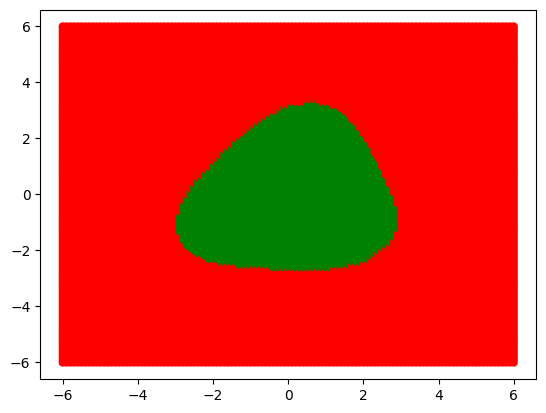

In [5]:
# Plot
color_mapping = {1: 'green', -1: 'red'}
markercolors = [color_mapping.get(label, 'gray') for label in classes]
plt.scatter(x_coordinates, y_coordinates, c=markercolors, marker='o', edgecolor='none')
plt.legend().set_visible(False)
plt.show()

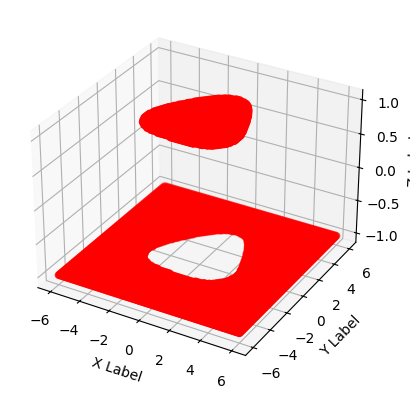

In [6]:
# Create a 3D figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(x_coordinates, y_coordinates, classes, c='r', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the 3D scatter plot
plt.show()